## Import Library

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
mse = tf.keras.losses.MeanSquaredError() 
mae = tf.keras.losses.MeanAbsoluteError()
np.set_printoptions(precision=5)

## Read Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/ML//2020-9-22--550hours.csv", index_col="datetime")
data.head()

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-22 08:56:06,0.781092,26.519396,4.629490,0.015649,0.635937,0.095390,30.039738,40.477000,324.442160,41.287181,...,324.372223,113.223134,112.283353,184.272961,False,False,False,False,30.040635,2.327032
2020-09-22 08:56:16,0.780581,26.876701,4.629533,0.015649,0.644175,0.096653,29.894164,40.478285,324.216285,41.346787,...,324.632507,112.656876,111.810486,184.408853,False,True,False,False,30.086357,2.327000
2020-09-22 08:56:26,0.780071,26.841930,4.629576,0.015650,0.652414,0.097916,29.888657,40.479571,323.990409,42.271664,...,323.534198,112.142281,111.307810,184.532822,False,True,False,False,30.132080,2.004000
2020-09-22 08:56:36,0.779006,26.914482,4.629619,0.015650,0.660653,0.099179,29.815544,40.480857,325.125764,54.836514,...,324.473541,111.643585,110.777321,184.597794,False,True,False,False,30.117502,1.788500
2020-09-22 08:56:46,0.779640,26.974942,4.629654,0.015650,0.667518,0.100231,29.799110,40.481928,325.325733,79.778458,...,324.473541,111.238269,110.391874,184.642502,False,True,False,False,30.095304,1.991000


## Encode and Normalization

we will encode the columns with categorical data and normalize the data, to do so we use The MinMaxScaler function, it will encode and normalize the data in the same time


In [4]:
min_max_scaler = MinMaxScaler()
F_data = pd.DataFrame(data = min_max_scaler.fit_transform(data), 
                  index = data.index, 
                  columns = data.columns)

In [5]:
F_data.head()

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-22 08:56:06,0.172092,0.327384,0.023149,0.001701,0.429059,0.224285,0.476186,0.708650,0.570587,0.098196,...,0.752295,0.564865,0.560115,0.959870,0.0,0.0,0.0,0.0,0.396145,0.440067
2020-09-22 08:56:16,0.170818,0.331793,0.023149,0.001701,0.429245,0.224566,0.473873,0.708693,0.570187,0.098573,...,0.752902,0.561342,0.557172,0.960739,0.0,1.0,0.0,0.0,0.396749,0.440064
2020-09-22 08:56:26,0.169544,0.331364,0.023149,0.001701,0.429432,0.224847,0.473786,0.708737,0.569788,0.104410,...,0.750339,0.558140,0.554042,0.961531,0.0,1.0,0.0,0.0,0.397353,0.416463
2020-09-22 08:56:36,0.166885,0.332260,0.023149,0.001701,0.429619,0.225129,0.472624,0.708781,0.571796,0.183718,...,0.752531,0.555038,0.550740,0.961946,0.0,1.0,0.0,0.0,0.397161,0.400716
2020-09-22 08:56:46,0.168470,0.333006,0.023150,0.001701,0.429775,0.225363,0.472363,0.708817,0.572150,0.341149,...,0.752531,0.552516,0.548340,0.962232,0.0,1.0,0.0,0.0,0.396867,0.415513


## Create inputs and outputs

In [6]:
inputs  = F_data.iloc[:,:-1] # read all data as input
outputs = F_data.iloc[:,-1] # Use the last Columns 'neoScattering' as output

In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.3, random_state = 0)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
"""
to get the equation used to get the NeoScattering 
we can use regressor.coef_ and regressor.intercept_ to get 
the Coeficent multiplied by each feature and the intercept added
"""
text = "neoScattering = "
for i,j in zip(regressor.coef_,X_train.columns):
  
  if i > 0 : text += f' +{i} * {j} '
  else :     text += f'{i} * {j}'

text += f" + {regressor.intercept_}"

print(text)

neoScattering =  +0.5722500984828898 * INNDAER 1 -0.29724162534176524 * AM-LUTVLAS A +0.04615461462884155 * BOR VEKT A  +0.04022013941960421 * DOLOM VEKT A -0.1191579642566943 * Kalivekt A +0.017871771569517428 * MGO VEKT  +0.07831743046315003 * NPLUT-INND A  +0.03946747503419365 * SALTVEKT TT W3401  +0.016050788426804713 * Turtallsreg. Fuge A  +0.04668914239172077 * Temperatur mikser A1  +0.7672647041337007 * Temperatur mikser B2 -1.0613862679655137 * Temperatur T3401 inndamping væskelås +0.10133571029571743 * SALTVEKT TT -0.3222890306413691 * INNDAER 2 +0.30911078159632294 * AM-LUTVLAS B  +0.047077139136567796 * DOLOM VEKT B -0.06409038202925757 * Kalivekt B +0.13682163849146245 * DIVERSE VEKT -0.1371589186168633 * RETURV BAND +0.03770606547265328 * Fuge B i posisjon  +0.04173715890452781 * Fuge A i posisjon -0.0033545296505461154 * Turtallsreg. Fuge B-0.13102662247989658 * Temperatur mikser B1-0.6118541632398985 * Temperatur mikser B3 +0.8851422962391592 * Temperatur T3402 inndampin

In [10]:
# Testing Phase
y_pred = regressor.predict(X_test)

In [11]:
print(f"Reggresion error for {X_test.shape[0]} tests")
print(f"Mean squared error = {mse(y_pred,np.array(y_test))}")
print(f"Mean Absolute error = {mae(y_pred,np.array(y_test))}")

Reggresion error for 59442 tests
Mean squared error = 0.0041970922611653805
Mean Absolute error = 0.04240979254245758


In [12]:
# Here we will test only 100 row 
Size = 100 
ix     = np.random.randint(0, X_test.shape[0], Size)
inp = []
out = []
for i in ix:
  inp.append(X_test.iloc[i])
  out.append(y_test.iloc[i])
X = np.array(inp) # inputs Rows used for test
Y = np.array(out).reshape(-1,1) # outputs 

In [13]:
Inverse = MinMaxScaler() # inverse minmax transform for Y
Inverse.fit(np.expand_dims(data['neoScattering'],-1))

MinMaxScaler()

In [14]:
y_pred = regressor.predict(X) # Prediction using regressor
y_pred = np.reshape(y_pred,(-1,1)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


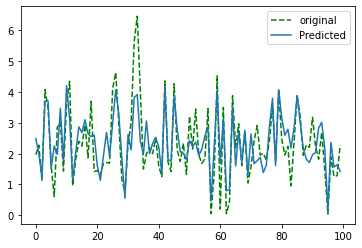

In [15]:
import matplotlib.pyplot as plt
plt.plot(Inverse.inverse_transform(Y),'g--', label="original")
plt.plot(Inverse.inverse_transform(y_pred), label = "Predicted")
plt.legend()
plt.show()

In [16]:
print(" Reggresion Error for only 100 test")
print(f"Mean squared error = {mse(Inverse.inverse_transform(Y),Inverse.inverse_transform(y_pred))}")
print(f"Mean Absolute error = {mae(Inverse.inverse_transform(Y),Inverse.inverse_transform(y_pred))}")

 Reggresion Error for only 100 test
Mean squared error = 0.4877655506134033
Mean Absolute error = 0.540066123008728
